Quantum Hadrodynamics

In [1]:
# The theory for this is given in the two uploaded pdfs and:
# 1. J.D. Walecka, Theoretical nuclear and subnuclear physics, 2nd Edition, World Scientific (2004): https://doi.org/10.1142/5500,
# 2. R. C. Tolman, Phys. Rev. 55, 364 (1939),
# 3. J. R. Oppenheimer and G.M. Volkoff, Phys. Rev. 55, 374 (1939).
# I am not completely sure about all the codes in this...

In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
def secant(f, x0):
    flag = 1
    h = 0.01
    x1 = x0
    f1 = f(x1)
    x2 = x1 + x1*h
    f2 = f(x2)
    for i in range(1000):
        x = x2 - f2*(x2-x1)/(f2-f1)
        if abs(x-x2)<0.001:
            flag = 0
            break
        x1 = x2
        if(x<0):
            x = 0.1
        x2 = x
        f1 = f(x1)
        f2 = f(x2)
    if abs(flag-1)<0.001:
        print('No Convergence')
        x = 0
    return x

In [4]:
def rk4(x0,y10,y20,xn,n,f1,f2):
    h=(xn-x0)/n
    ax = []
    ay1 = []
    ay2 = []
    
    ax.append(x0)
    ay1.append(y10)
    ay2.append(y20)
    for i in range (1,n+1):
    
        x=ax[i-1]
        y1=ay1[i-1]
        y2=ay2[i-1]

        y1k1=h*f1(x,y1,y2)
        y2k1=h*f2(x,y1,y2)
        y1k2=h*f1(x+0.5*h,y1+0.5*y1k1,y2+0.5*y2k1)
        y2k2=h*f2(x+0.5*h,y1+0.5*y1k1,y2+0.5*y2k1)
        y1k3=h*f1(x+0.5*h,y1+0.5*y1k2,y2+0.5*y2k2)
        y2k3=h*f2(x+0.5*h,y1+0.5*y1k2,y2+0.5*y2k2)
        y1k4=h*f1(x+h,y1+y1k3,y2+y2k3)
        y2k4=h*f2(x+h,y1+y1k3,y2+y2k3)
        
        ax.append(x+h)
        ay1.append(y1+(y1k1+y1k2+y1k2+y1k3+y1k3+y1k4)/6.0)
        ay2.append(y2+(y2k1+y2k2+y2k2+y2k3+y2k3+y2k4)/6.0)

    return ax,ay1,ay2

In [5]:
def lineint (x,xi,yi,ni):

    if(x<xi[0]):
        n=0
    elif(x>xi[ni-1]):
        n=ni-2
    else:
        for i in range (1,ni):
            if(x<=xi[i]):
                n=i-1
                break
    if (x!=x):
        return x
    return (x-xi[n])*(yi[n+1]-yi[n])/(xi[n+1]-xi[n])+yi[n]

In [6]:
# initialise various values
gamma_list = [2,4]
hc = 197.3269804
pi = math.pi
M = 939
M2 = M**2
ms = 500
mv = 782
cs2 = 267.1   # cs^2 = gs^2 * (M/ms)^2
cv2 = 195.9
ms2 = ms**2
mv2 = mv**2
gs2 = cs2*ms2/M2
gv2 = cv2*mv2/M2

kf_list = [x/100 for x in range(1,601)]   # kf from 0 to 6

Meff_list = []
E_list = []
logE_list = []
BE_list = []
P_list = []
logP_list = []

In [7]:
#Solving EoS
for gamma in gamma_list:
    Meff_list.append([])
    E_list.append([])
    logE_list.append([])
    BE_list.append([])
    P_list.append([])
    logP_list.append([])
    
    for kf in kf_list:
        kf = hc*kf
        rhoB = gamma*(kf**3)/(6*(pi**2))
        def f(x):
            efef=(kf**2+x**2)**0.5
            s = x - M + cs2*gamma*x/(4.0*pi**2*M**2)*(kf*efef-x**2*math.log((kf+efef)/x))
            return s
        Meff0 = M
        Meff = secant(f, Meff0)
        if abs(Meff-0)<0.001 or Meff<0:
            Meff = Meff0
        Meff_list[-1].append(Meff/M)
        efef=(kf**2+Meff**2)**0.5

        E=cv2*(rhoB**2)/(2*(M**2)) + (M**2)*((M-Meff)**2)/(2*cs2)+gamma*(kf*efef*(kf**2+efef**2)-(Meff**4)*math.log((kf+efef)/Meff))/((4*pi)**2)
        P=cv2*(rhoB**2)/(2*(M**2)) - (M**2)*((M-Meff)**2)/(2*cs2)+gamma*(kf*efef*(2*kf**2-3*Meff**2)+3*(Meff**4)*math.log((kf+efef)/Meff))/(3*(4*pi)**2)
        
        E_list[-1].append(E/(hc**3))
        BE_list[-1].append(E/rhoB - M)
        P_list[-1].append(P/(hc**3))

        if (P>0):
            logE_list[-1].append(math.log10(E*1.782661921e12/(hc**3)))
            logP_list[-1].append(math.log10(P*1.602176634e33/(hc**3)))

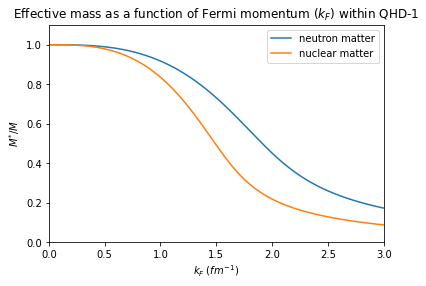

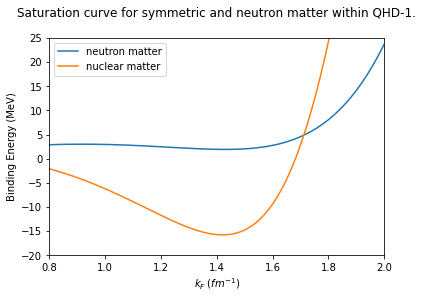

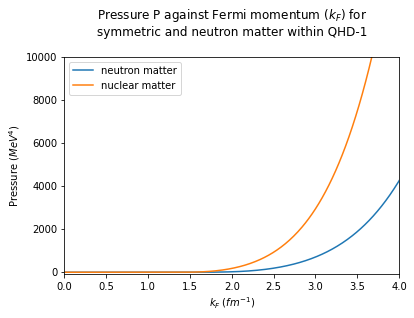

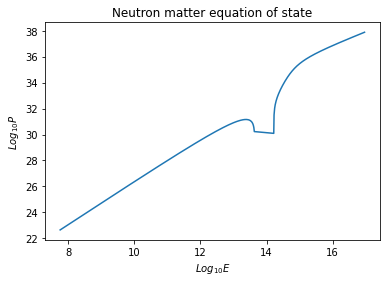

In [8]:
# Plotting results
plt.plot(kf_list, Meff_list[0], label = 'neutron matter')    
plt.plot(kf_list, Meff_list[1], label = 'nuclear matter')
ax = plt.gca()
ax.set_xlim([0, 3.0])
ax.set_ylim([0, 1.1])
plt.title('Effective mass as a function of Fermi momentum $(k_{F})$ within QHD-1')
plt.ylabel('$M^{*}/M$')
plt.xlabel('$k_{F}\; (fm^{-1})$')
plt.xlim(0,3)
plt.legend()
plt.show()

plt.plot(kf_list, BE_list[0], label = 'neutron matter')    
plt.plot(kf_list, BE_list[1], label = 'nuclear matter')
ax = plt.gca()
ax.set_xlim([0.8, 2.0])
ax.set_ylim([-20, 25])
plt.title('Saturation curve for symmetric and neutron matter within QHD-1.\n')
plt.ylabel('Binding Energy (MeV)')
plt.xlabel('$k_{F}\; (fm^{-1})$')
plt.legend()
plt.show()

# The labels in the notes are opposite and incorrect.
plt.plot(kf_list, P_list[0], label = 'neutron matter')    
plt.plot(kf_list, P_list[1], label = 'nuclear matter')
ax = plt.gca()
ax.set_xlim([0, 4])
ax.set_ylim([-100, 1e4])
plt.title('Pressure P against Fermi momentum $(k_{F})$ for \n symmetric and neutron matter within QHD-1 \n')
plt.ylabel('Pressure $(MeV^{4})$')
plt.xlabel('$k_{F}\; (fm^{-1})$')
plt.legend()
plt.show()

#P vs E logarithmic graph
plt.plot(logE_list[0], logP_list[0])
ax = plt.gca()
plt.title('Neutron matter equation of state')
plt.ylabel('$Log_{10}P$')
plt.xlabel('$Log_{10}E$')
plt.show()

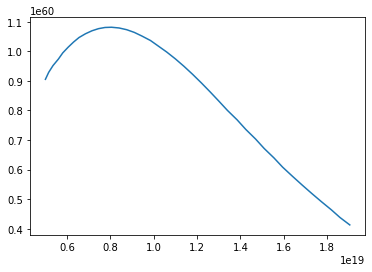

In [9]:
# Neutron Star using polytrope E = (P/k)^(1/g)
k = 8.876746957e-4
g = 5/3
const = 7.55466e41    #const = c^4/G in MeV/fm
n_pts = 2000
r_list = []
m_list = []

def f1(x,y1,y2):
    return -(eps(y1)+y1)*(y2+4*pi*x**3*y1)/(const*x**2-2*x*y2)

def f2(x,y1,y2):
    return 4*pi*x**2*eps(y1)

def eps(p):
    return (p/k)**(1/g)
                   
P0_list = [10**(x/10) for x in range(1,41)]
for P0 in P0_list: 
    flag = False
    ax,ap,am = rk4(1,P0,0,1e20,n_pts,f1,f2)
    for i in range (n_pts+1):
        if (ap[i]!=ap[i]):
            flag = True
            break
        if isinstance(ap[i], complex):
            flag = True
            break
        if(ap[i]<0.0001):
            flag = True
            break
    if flag:
        r_list.append(ax[i-1])
        m_list.append(am[i-1])    
plt.plot(r_list,m_list) 

In [10]:
#sort for interpolation
xi = P_list[0]
yi = E_list[0]
xi, yi = zip(*sorted(zip(xi,yi)))
xi = list(xi)
yi = list(yi)
ni = len(P_list[0])

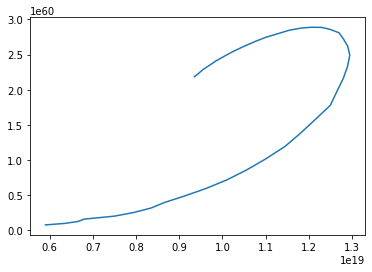

In [11]:
# Neutron Star using linear interpolation
const = 7.55466e41 #const = c^4/G in MeV/fm
n_pts = 2000
r_list = []
m_list = []

def f1(x,y1,y2):
    return -(eps(y1)+y1)*(y2+4*pi*x**3*y1)/(const*x**2-2*x*y2)

def f2(x,y1,y2):
    return 4*pi*x**2*eps(y1)

def eps(p):
    return lineint(p,xi,yi,ni)
                   
P0_list = [10**(x/10) for x in range(1,41)]
for P0 in P0_list: 
    flag = False
    ax,ap,am = rk4(1,P0,0,1e20,n_pts,f1,f2)
    for i in range (n_pts+1):
        if (ap[i]!=ap[i]):
            break
        if isinstance(ap[i], complex):
            break
        if(ap[i]<0.0001):
            flag = True
            break
    if flag:
        r_list.append(ax[i-1])
        m_list.append(am[i-1])    
plt.plot(r_list,m_list)       